In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/BregmanClustering.git --no-deps
!pip install torch_geometric rpy2==3.5.1
import os
import pickle
from sys import platform
import BregmanTests
os.chmod(BregmanTests.__path__[0]+"/install_algos.sh",777)
if platform == "win32":
    os.environ["R_HOME"] = r"C:\\Program Files\R\R-4.2.3"
else:
    ### Uncomment line below if in Google Colab environment
    print(os.path.isfile(BregmanTests.__path__[0]+"/install_algos.sh"))
    ### Done

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FelipeSchreiber/BregmanClustering.git to /tmp/pip-req-build-s3s1zpb_
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/BregmanClustering.git /tmp/pip-req-build-s3s1zpb_
  Resolved https://github.com/FelipeSchreiber/BregmanClustering.git to commit f763b97a57200d00f5445c0e51907de27e02de61
  Preparing metadata (setup.py) ... done
  Created wheel for bregClust: filename=bregClust-1.0-py3-none-any.whl size=34865 sha256=693356820d87fe47a63ed6f3483467bdecbefc5032a3396b12257b6d55b859ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-vxrr63ze/wheels/3f/90/fb/833529540c1d5f19c385fde761cc07c664c4b9a5edf7c6735b
Successfully built bregClust
  Attempting uninstall: bregClust
    Found existing installation: bregClust 1.0
    Uninstalling bregClust-1.0:
      Successfully uninstalled bregClust-1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
True


In [15]:
from BregmanTests.benchmark import *
n_average = 20
n = 600
n_clusters = 2
d = 1
sizes = [ n // n_clusters ]*np.ones( n_clusters, dtype = int )

>>>  graph


100%|██████████| 5/5 [58:34<00:00, 702.88s/it]


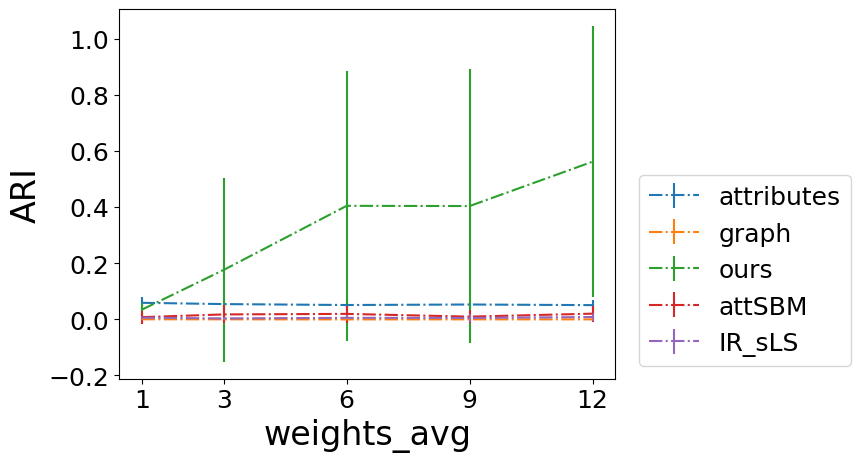

>>>  attributes


100%|██████████| 5/5 [55:28<00:00, 665.69s/it]


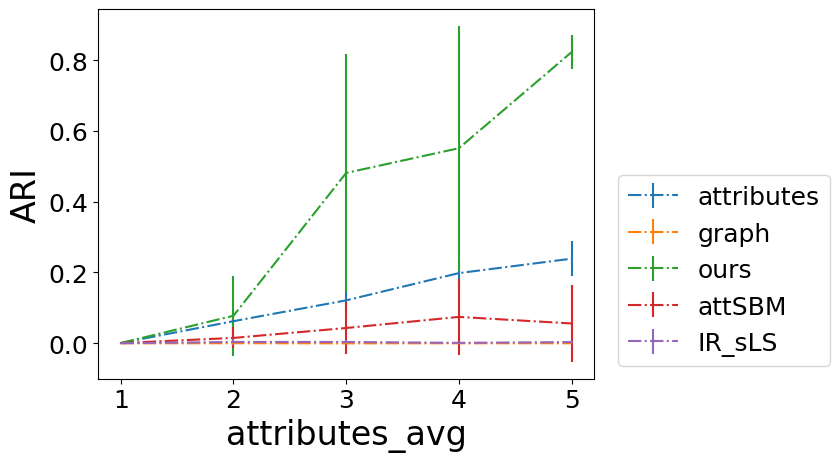

In [16]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,5)
w_averages = np.array([1,3,6,9,12])
stats = BregmanBenchmark(att_variance=n_average,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_5(n_average=n_average,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_5.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_5.pickle" "/content/drive/MyDrive"

In [17]:
test_2_5=None
with open("/content/drive/MyDrive/test_2_5.pickle", 'rb') as handle:
    test_2_5 = pickle.load(handle)
test_2_5.keys()

dict_keys(['attributes_avg', 'weights_avg', 'ARI', 'varying', 'ARI_std', 'algorithm'])

In [19]:
import pandas as pd
df = pd.DataFrame.from_dict(test_2_5)

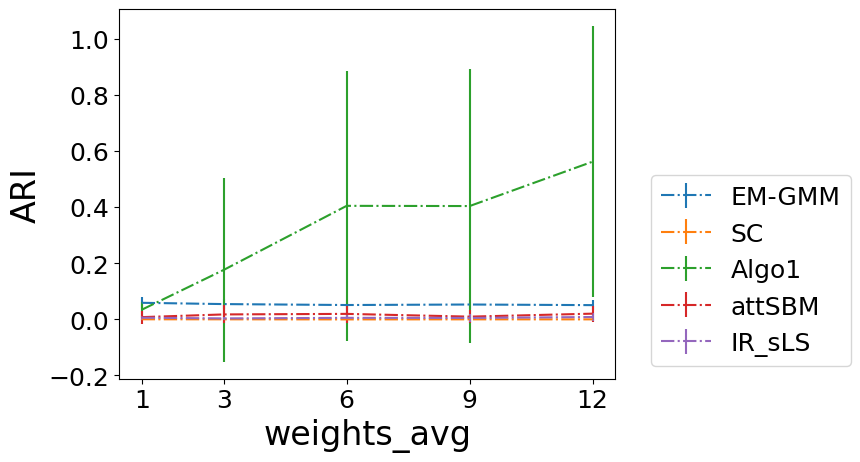

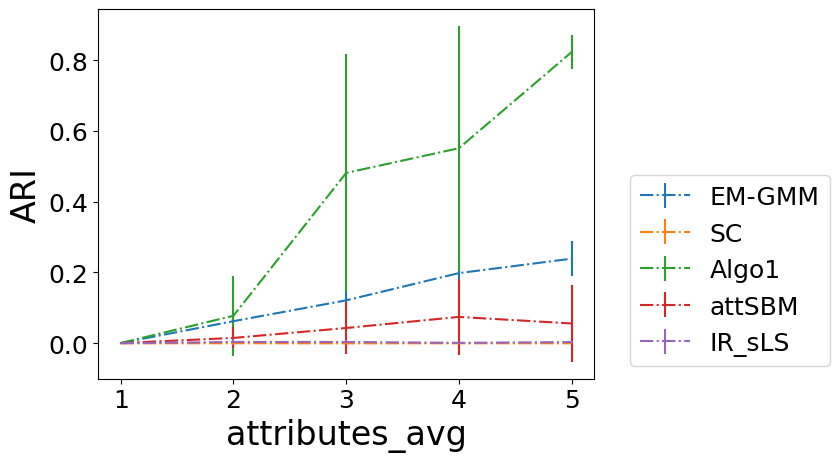

In [21]:
labels = [ 'EM-GMM', 'SC', 'Algo1', 'attSBM','IR_sLS']
algos = ["attributes", "graph", "ours", "attSBM", "IR_sLS"]
saveFig = True
for varying in ["graph","attributes"]:
  curves = []
  curves_std = []
  for algo in algos:
    curves.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI"])
    curves_std.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI_std"])
  if varying == 'graph':
    x = df.loc[(df['varying'] == "graph")]["weights_avg"].unique()    
    fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_att_' + str(2)  +  '_nAverage' + str(n_average) + '.jpeg'
    plotting( x, curves, labels, curves_std = curves_std, xticks = x, xlabel = 'weights_avg', saveFig = True, fileName = fileName )
    plt.close()
  elif varying == 'attributes':
    x = df.loc[(df['varying'] == "attributes")]["attributes_avg"].unique()
    fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_w_' + str(2) + '_nAverage_' + str(n_average) + '.jpeg'
    plotting( x , curves, labels, curves_std = curves_std, xticks = x, xlabel = 'attributes_avg', saveFig = True, fileName = fileName )
    plt.close()

In [22]:
df

,attributes_avg,weights_avg,ARI,varying,ARI_std,algorithm
0,2.0,1,0.033879,graph,0.028457,ours
1,2.0,1,0.005532,graph,0.007762,IR_sLS
2,2.0,1,0.007633,graph,0.022994,attSBM
3,2.0,1,-0.000104,graph,0.001303,graph
4,2.0,1,0.058701,graph,0.020224,attributes
5,2.0,3,0.175882,graph,0.327962,ours
6,2.0,3,0.003129,graph,0.005055,IR_sLS
7,2.0,3,0.017235,graph,0.032000,attSBM
8,2.0,3,-0.000224,graph,0.000314,graph
9,2.0,3,0.054120,graph,0.019015,attributes


In [5]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,10)
w_averages = np.linspace(1,5,10)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_4(n_average=10,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_4.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_4.pickle" "/content/drive/MyDrive"

2it [06:13, 186.63s/it]


KeyboardInterrupt: ignored

In [ ]:
# attributes_distribution = "bernoulli"
# edge_distribution = "bernoulli"
# weight_distribution = "gaussian"
# scores = BregmanBenchmark(att_variance=1,
#                     attributes_distribution=attributes_distribution,
#                     weight_variance=1,
#                     weight_distribution=weight_distribution,
#                     edge_distribution=edge_distribution,
#                     run_torch=False)\
#                   .run_real_data()
# scores

In [ ]:
# attributes_distribution = "gaussian"
# edge_distribution = "bernoulli"
# weight_distribution = "exponential"
# BregmanBenchmark(att_variance=1,
#                     attributes_distribution=attributes_distribution,
#                     weight_variance=1,
#                     weight_distribution=weight_distribution,
#                     edge_distribution=edge_distribution,
#                     run_torch=False)\
#                  .run_test(n_average=n_average,cluster_sizes=sizes,\
#                  b=5,\
#                  a_range=[ 5,7,9,11,13,15 ],\
#                  r_range = [ 0,1,2,3,4,5 ],\
#                  dense=False,\
#                  binary=True,\
#                  file_endings=".jpeg",\
#                  n_iters=25)

In [ ]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,1)
r_range = np.linspace(0,0.7,1)*np.log(n)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False)\
                  .run_2_1(n_average=1,
                            cluster_sizes=sizes,
                            b=5,
                            a_range= a_range,
                            r_range = r_range,
                            dense=False,
                            binary=True)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

In [ ]:
# attributes_distribution = "poisson"
# edge_distribution = "bernoulli"
# weight_distribution = "gaussian"
# d_range = np.arange(1,6)
# mu_range = np.linspace(0,6,20)
# att_centers = np.arange(1,4).reshape(-1,1)
# stats = BregmanBenchmark(att_variance=1,
#                     attributes_distribution=attributes_distribution,
#                     weight_variance=1,
#                     weight_distribution=weight_distribution,
#                     edge_distribution=edge_distribution,
#                     att_centers=att_centers,
#                     run_torch=False
#                   )\
#                   .run_2_2(n_average=10,
#                             cluster_sizes=sizes,
#                              d_range = d_range,
#                              mu_range = mu_range,
#                              dense=True,
#                              binary=False)
# with open('test_2_2.pickle', 'wb') as handle:
#     pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
# !cp "/content/test_2_2.pickle" "/content/drive/MyDrive"

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
d_range = np.arange(1,5)
a_range = np.linspace(5,14,10)
lambda_range = np.arange(1,6)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                 )\
                  .run_2_3(n_average=10,
                            cluster_sizes=sizes,
                            d_range= d_range,
                            lambda_range = lambda_range,
                            a_range = a_range,
                            b = 5,
                            dense=False,
                            binary=False)
with open('test_2_3.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_3.pickle" "/content/drive/MyDrive"

In [ ]:
from BregmanTests.utils import *

In [23]:
test_2_1=None
with open("/content/drive/MyDrive/test_2_1.pickle", 'rb') as handle:
    test_2_1 = pickle.load(handle)
test_2_1.keys()

FileNotFoundError: ignored

In [ ]:
def scatter_(dict_,x_name,y_name,z_name):
  fig, ax = plt.subplots()
  x,y = dict_[x_name],dict_[y_name]
  ax.scatter(x,y)
  for i, txt in enumerate(dict_[z_name]):
      ax.annotate("{:.2f}".format(txt), (x[i], y[i]))
  ax.set_xlabel(x_name)
  ax.set_ylabel(y_name)
scatter_(test_2_1,'a', 'r', 'ARI')

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
xlabel="a"
ylabel="r"
ticks = np.linspace(0, 1, 5, endpoint=True)
C = ax.scatter(x=x,y=y,c=z,cmap="coolwarm")
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI',ticks=ticks)
cb.set_label(label='ARI', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

In [ ]:
test_2_4=None
SIZE_TITLE = 24
SIZE_LABELS = 24
SIZE_TICKS = 18
SIZE_LEGEND = 18
with open("/content/drive/MyDrive/test_2_4.pickle", 'rb') as handle:
    test_2_4 = pickle.load(handle)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = np.array(test_2_4["lambda_att"]),np.array(test_2_4["lambda_w"]),np.array(test_2_4["ARI"])
xlabel="attributes_avg"
ylabel="weights_avg"
C = ax.scatter(x=1/x,y=1/y,c=z,cmap="coolwarm")
plt.ylim(0.9,3.5)
ticks = np.linspace(z.min(), z.max(), 5, endpoint=True)
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI',ticks=ticks)
cb.set_label(label='ARI', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

In [ ]:
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0]).T
make_contour_plot(vals_x,vals_y,z,x_label="a",y_label="r",filename="contour_plot_2_1.jpeg")

In [ ]:
test_2_2=None
with open("/content/drive/MyDrive/test_2_2.pickle", 'rb') as handle:
    test_2_2 = pickle.load(handle)
test_2_2.keys()

In [ ]:
scatter_(test_2_2,'d', 'mu', 'ARI')

In [ ]:
x,y,z = test_2_2["d"],test_2_2["mu"],test_2_2["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
# x,y = np.meshgrid(vals_x,vals_y)
z = np.array(z).reshape(len(vals_x),len(vals_y)).T
make_contour_plot(vals_x,vals_y,z,x_label="d",y_label="mu",filename="contour_plot_2_2.jpeg")

In [ ]:
test_2_3=None
with open("/content/drive/MyDrive/test_2_3.pickle", 'rb') as handle:
    test_2_3 = pickle.load(handle)
test_2_3.keys()

In [ ]:
x,y,z,data = test_2_3["d"],test_2_3["lambda"], test_2_3["a"],test_2_3["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
vals_z = np.unique(z)
"""
len(X) == N is the number of columns in data,
len(Y) == M is the number of rows in data.
len(Z) == P is the depth of data
DATA = M x N X P
"""
X = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
data = np.array(data).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
x_label="d"
y_label="lambda"
z_label = "a"

kw = {
        # 'vmin': data.min(),
        # 'vmax': data.max()
    }

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot contour surfaces
    ### This is the X x Y plane for z=zmax 
_ = ax.contourf(
            X[:, :, -1], Y[:, :, -1], data[:, :, -1],
            zdir='z', offset=zmax, **kw
        )
    
    ### This is the X x Y plane for z=zmin 
_ = ax.contourf(
            X[:, :, 0], Y[:, :, 0], data[:, :, 0],
            zdir='z', offset=zmin, **kw
        )

    ### This is the X x Z plane for y=ymax 
_ = ax.contourf(
            X[-1, :, :], data[-1, :, :], Z[-1, :, :],
            zdir='y', offset=ymax, **kw
        )

    ### This is the X x Z plane for y=ymin 
_ = ax.contourf(
            X[0, :, :], data[0, :, :], Z[0, :, :],
            zdir='y', offset=ymin, **kw
        )

    ### This is the Y x Z plane for x=xmax 
_ = ax.contourf(
            data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
            zdir='x', offset=xmax, **kw
        )

    ### This is the Y x Z plane for x=xmin
C = ax.contourf(
            data[:, 0, :], Y[:, 0, :], Z[:, 0, :],
            zdir='x', offset=xmin, **kw
        )


# Plot edges
edges_kw = dict(color='0.4', linewidth=1,zorder=-1e3)
ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )

# Set zoom and angle view
ax.view_init(30, 45, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI')

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )
C = ax.scatter(xs=X,ys=Y,zs=Z,c=data)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.2, label='ARI')
plt.show()